#Q1

O dataset avaliado é composto por uma variável TFP (variável rtfpna)  para três países: Estados Unidos (EUA), Canadá (CAN) e México (MEX).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("TFP.csv")

df.head()

,isocode,year,rtfpna
0,USA,1950,0.617148
1,USA,1951,0.629588
2,USA,1952,0.638451
3,USA,1953,0.651858
4,USA,1954,0.646179


In [6]:
df.describe()

,year,rtfpna
count,186.000000,186.000000
mean,1980.500000,0.975614
std,17.943831,0.177538
min,1950.000000,0.617148
25%,1965.000000,0.855143
50%,1980.500000,0.995047
75%,1996.000000,1.046348
max,2011.000000,1.383718


In [7]:
df.isnull().sum()

isocode    0
year       0
rtfpna     0
dtype: int64

In [8]:
df.isocode.value_counts()

CAN    62
USA    62
MEX    62
Name: isocode, dtype: int64

Criado um `dataframe` a partir do dataset fornecido, verificamos que a variável rtfpna não apresenta possíveis outliers e também não possui variáveis nulas. A contagem de inputs relacionada a cada pais é de igual valor para todos(62 entradas para cada pais).

##EUA

In [9]:
df_usa = df.loc[df.isocode == 'USA'].copy()
df_usa.tail()

,isocode,year,rtfpna
57,USA,2007,1.006595
58,USA,2008,0.998499
59,USA,2009,0.986738
60,USA,2010,1.009463
61,USA,2011,1.020392


In [10]:
df_usa.describe()

,year,rtfpna
count,62.000000,62.000000
mean,1980.500000,0.803824
std,18.041619,0.116121
min,1950.000000,0.617148
25%,1965.250000,0.739949
50%,1980.500000,0.766047
75%,1995.750000,0.880544
max,2011.000000,1.020392


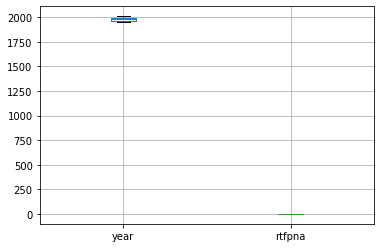

In [11]:
df_usa.boxplot()

A partir do gráfico boxplot, não observamos outliers nos dados dos Estados Unidos.

In [12]:
df_usa.index = pd.to_datetime(df_usa.year, format='%Y')
df_usa.drop('year', inplace=True, axis=1)

df_usa.head()

,isocode,rtfpna
year,,
1950-01-01,USA,0.617148
1951-01-01,USA,0.629588
1952-01-01,USA,0.638451
1953-01-01,USA,0.651858
1954-01-01,USA,0.646179


In [13]:
ts = df_usa.rtfpna 

ts.head(10)

year
1950-01-01    0.617148
1951-01-01    0.629588
1952-01-01    0.638451
1953-01-01    0.651858
1954-01-01    0.646179
1955-01-01    0.668773
1956-01-01    0.661000
1957-01-01    0.662165
1958-01-01    0.654813
1959-01-01    0.680680
Name: rtfpna, dtype: float64

Para poder avaliar de forma individual a variável `rtfpna` de cada pais, crio outros dataframes individuais de cada país. Iniciando com os Estados Unidos.

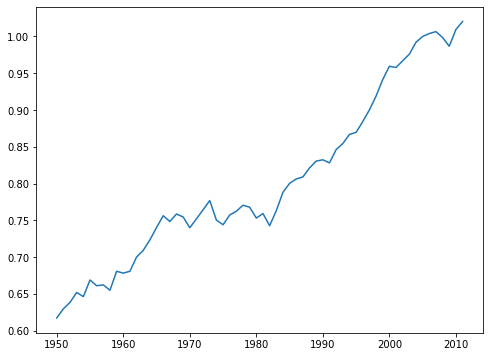

In [14]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(ts);

A partir do gráfico acima, podemos ver que o índice `rtfpna` cresce ao longo do tempo, onde podemos observar uma pequena queda entre o final dos anos 70 e meados dos anos 80 mas, logo se observa uma recuperação.

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()  #pd.rolling_mean(timeseries, window=12)
    rolstd = timeseries.rolling(window=12).std()  #pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

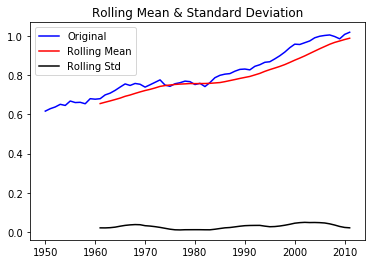

Results of Dickey-Fuller Test:
Test Statistic                  0.223647
p-value                         0.973557
#Lags Used                      0.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64


In [16]:
test_stationarity(ts)

Observamos que a média acompanha a evolução do gráfico e que nosso dataframe é uma série não-estacionária.

##CAN

Da mesma forma que fizemos com os dados dos Estados unidos, iremos fazer com os dados do Canadá.

In [17]:
df_can = df.loc[df.isocode == 'CAN'].copy()

df_can.tail()

,isocode,year,rtfpna
119,CAN,2007,0.981433
120,CAN,2008,0.958357
121,CAN,2009,0.926482
122,CAN,2010,0.932567
123,CAN,2011,0.929405


In [18]:
df_can.index = pd.to_datetime(df_can.year, format='%Y')
df_can.drop('year', inplace=True, axis=1)

df_can.head()

,isocode,rtfpna
year,,
1950-01-01,CAN,0.843335
1951-01-01,CAN,0.855123
1952-01-01,CAN,0.896489
1953-01-01,CAN,0.910658
1954-01-01,CAN,0.875178


In [19]:
df_can.describe()

,rtfpna
count,62.000000
mean,0.992886
std,0.050126
min,0.843335
25%,0.973294
50%,1.004211
75%,1.029513
max,1.066104


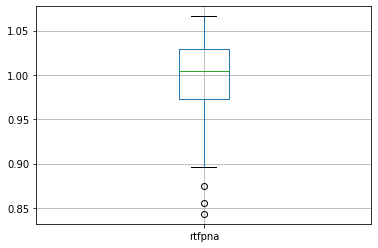

In [20]:
df_can.boxplot()

Nos dados do Canadá podemos observar um número não significativo de outliers abaixo do valor mínimo no gráfico boxplot.

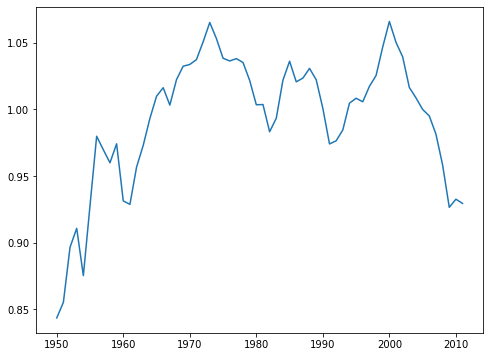

In [21]:
ts = df_can.rtfpna 
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(ts);

O comportamento dos valores no gráfico oscila bastante, tendo picos em meados dos anos 70 e nos anos 2000.

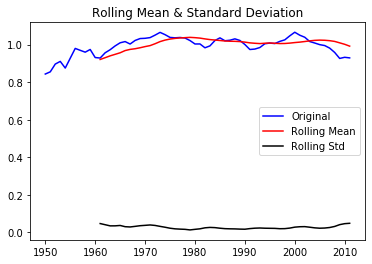

Results of Dickey-Fuller Test:
Test Statistic                 -3.027753
p-value                         0.032383
#Lags Used                      1.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


In [22]:
test_stationarity(ts)

Com uma média quase que constante, os dados referente ao Canadá são mais próximos de uma série estacionária.

##MEX

In [23]:
df_mex = df.loc[df.isocode == 'MEX'].copy()
df_mex.tail()

,isocode,year,rtfpna
181,MEX,2007,1.013673
182,MEX,2008,0.991548
183,MEX,2009,0.915879
184,MEX,2010,0.941604
185,MEX,2011,0.955766


In [24]:
df_mex.index = pd.to_datetime(df_mex.year, format='%Y')
df_mex.drop('year', inplace=True, axis=1)

df_mex.head()

,isocode,rtfpna
year,,
1950-01-01,MEX,0.798159
1951-01-01,MEX,0.860931
1952-01-01,MEX,0.876968
1953-01-01,MEX,0.855204
1954-01-01,MEX,0.929168


In [25]:
df_mex.describe()

,rtfpna
count,62.000000
mean,1.130132
std,0.158209
min,0.798159
25%,1.012231
50%,1.093859
75%,1.299591
max,1.383718


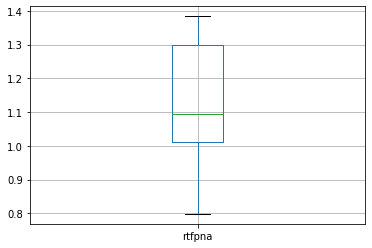

In [26]:
df_mex.boxplot()

Assim como nos dados referente aos Estados Unido, no México não observamos outliers.

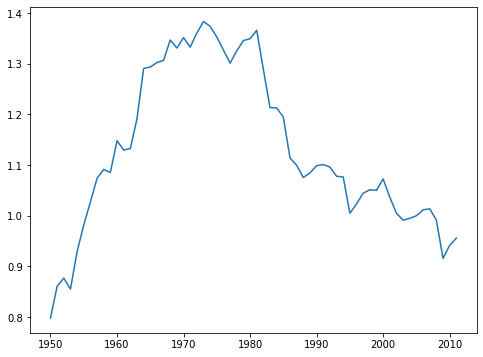

In [27]:
ts = df_mex.rtfpna 
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(ts);

O Valor do índice `rtfpna` teve uma ascenção desde os anos 50 até meados dos anos 70, desde então entrou em queda com pequenas recuperações mas não foram suficientes para manter seu valor mais constante.

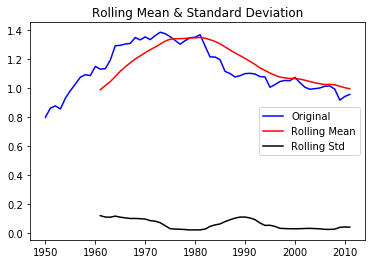

Results of Dickey-Fuller Test:
Test Statistic                 -1.940444
p-value                         0.313281
#Lags Used                      9.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


In [28]:
test_stationarity(ts)

Com a oscilação da média, nossa série é considerada não-estacionária.

#Q3

Referente ao link 'https://cran.r-project.org/web/packages/pwt8/pwt8.pdf'. Com o dataset completo, poderia ser feita predições com maior clareza e levando fatores como população, número de pessoas envolvidas, média anual de horas trabalhadas, entre outras variáveis. Poderia ser correlacionado o índice `rtfpna` com outras variáveis.